# Use Case Example #1

## Setup

In this example, we will show case 


In [ ]:
from canoPyHydro.CylinderCollection import CylinderCollection

# Initializing a CylinderCollection object
myCollection = CylinderCollection()

# Converting a specified file to a CylinderCollection object
myCollection.from_csv("example_tree.csv")

# Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XZ")
myCollection.draw("XZ")

# Requesting an plot of the tree projected onto the YZ plane ('side' view)
myCollection.project_cylinders("YZ")
myCollection.draw("YZ")

# Requesting an plot of the tree projected onto the XY plane (Birds eye view)
myCollection.project_cylinders("XY")
myCollection.draw("XY")

In [ ]:
# Finding and Highlighting the stem flow component
import os
os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from src.canopyhydro.CylinderCollection import CylinderCollection
from matplotlib import pyplot as plt

# Initializing a CylinderCollection object
myCollection = CylinderCollection()

# Converting a specified file to a CylinderCollection object
myCollection.from_csv("example_tree.csv")

# Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XY")


myCollection.initialize_digraph_from()
myCollection.find_flow_components()
myCollection.calculate_flows()


myCollection.draw(
    "XY", highlight_lambda=lambda: is_stem, save=True, file_name_ext="docs_ex"
)
myCollection.draw(
    "XZ", highlight_lambda=lambda: is_stem, save=True, file_name_ext="docs_ex"
)

In [ ]:
myCollection.watershed_boundary(plane='XY' ,draw=True, stem=True, save=True, file_name_ext="docs_ex")

In [ ]:
# Finding and Highlighting the stem flow component
import os
os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from src.canopyhydro.CylinderCollection import CylinderCollection
from matplotlib import pyplot as plt

# Initializing a CylinderCollection object
myCollection = CylinderCollection()

# Converting a specified file to a CylinderCollection object
myCollection.from_csv("example_tree.csv")

# Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XY")


myCollection.initialize_digraph_from()
myCollection.find_flow_components()
myCollection.calculate_flows()
myCollection.watershed_boundary(
                component=myCollection.stem_flow_component,
                plane='XY',
                draw=True,
                stem=True,
                save=True, file_name_ext="stem_alpha")

In [ ]:
# Drawing various branch orders
from matplotlib import pyplot as plt
import os

os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from src.canopyhydro.CylinderCollection import CylinderCollection

# Initializing a CylinderCollection object
myCollection = CylinderCollection()

# Converting a specified file to a Cyl0nderCollection object
myCollection.from_csv("example_tree.csv")

# Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XY")
fix, ax = plt.subplots(4, 1, figsize=(10, 10))
myCollection.draw("XZ",filter_lambda=lambda: branch_order <= 1,highlight_lambda=lambda: branch_order == 1,save=True,file_name_ext="_bo_le_1",
)
ax[1] = myCollection.draw(
    "XZ",
    filter_lambda=lambda: branch_order <= 2,
    highlight_lambda=lambda: branch_order == 2,
    save=True,
    file_name_ext="_bo_le_2",
)
ax[2] = myCollection.draw(
    "XZ",
    filter_lambda=lambda: branch_order <= 3,
    highlight_lambda=lambda: branch_order == 3,
    save=True,
    file_name_ext="_bo_le_3",
)
ax[3] = myCollection.draw(
    "XZ",
    filter_lambda=lambda: branch_order <= 4,
    highlight_lambda=lambda: branch_order == 4,
    save=True,
    file_name_ext="_bo_le_4",
)
plt.show()

Graph not initialized, running initialize_graph_from with default values


will draw 23 cylinders


AttributeError: 'GeometryCollection' object has no attribute 'exterior'

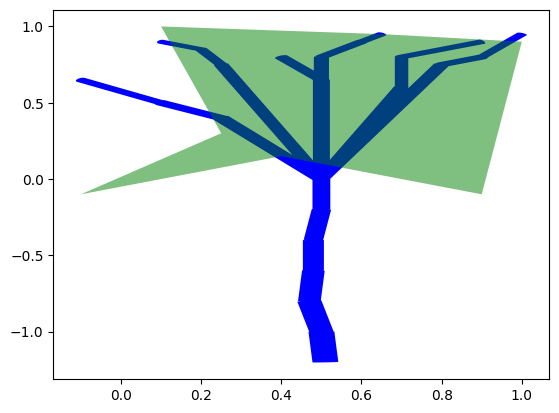

In [1]:
# Drawing various branch orders
from matplotlib import pyplot as plt
import os

os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from src.canopyhydro.CylinderCollection import CylinderCollection

# # Initializing a CylinderCollection object
myCollection = CylinderCollection()

# # Converting a specified file to a Cyl0nderCollection object
# # myCollection.from_csv("example_tree.csv")
myCollection.from_csv("charlie_brown.csv")

# # Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XY")

# # myCollection.draw("XY", include_alpha_shape=True)
myCollection.watershed_boundary(plane = 'XY', curvature_alpha= 1.8) #, filter_lambda=lambda: branch_order <= 1)

myCollection.draw("XY", include_alpha_shape=True, save=True, file_name_ext="hull_tutorial")

In [1]:
# myCollection.draw("XY", save=True, file_name_ext="hull_tutorial")
# myCollection.draw("XZ", save=True, file_name_ext="hull_tutorial")
myCollection.watershed_boundary(curvature_alpha=3)
myCollection.draw("XY", include_alpha_shape=True)

NameError: name 'myCollection' is not defined

In [1]:

#from matplotlib import pyplot as plt
import os
from matplotlib import pyplot as plt

os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from src.canopyhydro.CylinderCollection import CylinderCollection

# # Initializing a CylinderCollection object
myCollection = CylinderCollection()

# # Converting a specified file to a Cyl0nderCollection object
# # myCollection.from_csv("example_tree.csv")
myCollection.from_csv("charlie_brown.csv")

# # Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XZ")

# # myCollection.draw("XY", include_alpha_shape=True)
hull, bps = myCollection.watershed_boundary(plane = 'XZ', curvature_alpha= 1.8)
myCollection.draw("XZ", include_alpha_shape=True, include_drips=True)
#, save=True, file_name_ext="hull_tutorial_ex_tree")
plt.show()

myCollection.drip_map('XY')
plt.scatter([p.x for p in bps],[p.y for p in bps])


Graph not initialized, running initialize_graph_from with default values


UnboundLocalError: local variable 'boundary_points' referenced before assignment

['__and__', '__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__geo_interface__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__xor__', '_geom', '_geom_prepared', '_ndim', '_repr_svg_', 'almost_equals', 'area', 'boundary', 'bounds', 'buffer', 'centroid', 'contains', 'contains_properly', 'convex_hull', 'coords', 'covered_by', 'covers', 'crosses', 'difference', 'disjoint', 'distance', 'dwithin', 'envelope', 'equals', 'equals_exact', 'geom_type', 'geometryType', 'has_z', 'hausdorff_distance', 'interpolate', 'intersection', 'intersects', 'is_closed', 'is_empty', 'is_ring', 'is_simple', 'is_valid', 'length', 'line_interpolate_point', 'line_locate_point', 'minimum_clearance', 'minimum_rotated_re

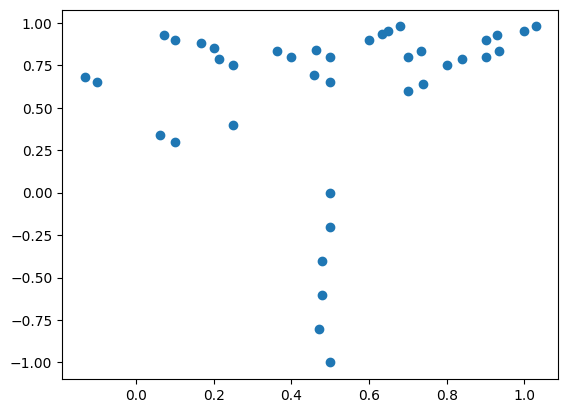

In [12]:
print(dir(bps[0]))

In [ ]:

import os
from matplotlib import pyplot as plt

os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from src.canopyhydro.CylinderCollection import CylinderCollection

# # Initializing a CylinderCollection object
myCollection = CylinderCollection()

# # Converting a specified file to a Cyl0nderCollection object
myCollection.from_csv("example_tree.csv")

# # Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XY")

# # myCollection.draw("XY", include_alpha_shape=True)
hull, bps = myCollection.watershed_boundary(plane = 'XZ', curvature_alpha= 1.8)
myCollection.draw("XY", include_alpha_shape=True, include_drips=True)
#, save=True, file_name_ext="hull_tutorial_ex_tree")
plt.show()
